In [51]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

In [52]:
import pandas as pd
import glob

path = r'C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/USD XAU/Data/' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = ['Index','Timestamp','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote','Close_Bid_Quote','Volume']
    df.drop(columns=['Index','Volume','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote'],inplace=True)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

<Figure size 1440x360 with 0 Axes>

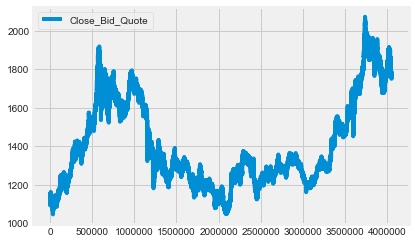

In [53]:
plt.figure(figsize=(20,5))
data.plot()

In [54]:
data.head

<bound method NDFrame.head of                    Timestamp  Close_Bid_Quote
0        2010-01-03 18:01:00         1099.550
1        2010-01-03 18:02:00         1099.200
2        2010-01-03 18:03:00         1099.700
3        2010-01-03 18:04:00         1099.950
4        2010-01-03 18:05:00         1100.050
...                      ...              ...
4052841  2021-06-30 23:54:00         1775.368
4052842  2021-06-30 23:55:00         1775.638
4052843  2021-06-30 23:56:00         1775.655
4052844  2021-06-30 23:57:00         1775.715
4052845  2021-06-30 23:58:00         1775.655

[4052846 rows x 2 columns]>

In [55]:
data['Timestamp'].min()

'2010-01-03 18:01:00'

In [56]:
data['Timestamp'].max()

'2021-06-30 23:58:00'

In [57]:
from datetime import datetime                                              
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')

In [58]:
data = data.resample("D").max()

In [59]:
data.columns

Index(['Close_Bid_Quote'], dtype='object')

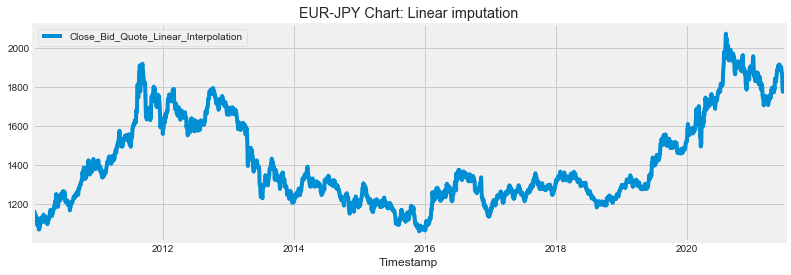

In [60]:
data = data.assign(Close_Bid_Quote_Linear_Interpolation=data.Close_Bid_Quote.interpolate(method='linear'))
data[['Close_Bid_Quote_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('USD-XAU Chart: Linear imputation')
plt.show(block=False)

In [61]:
data.drop(columns=['Close_Bid_Quote'],inplace=True)

In [62]:
data=data.rename(columns={"Close_Bid_Quote_Linear_Interpolation": "Close_Bid_Quote"}, errors="raise")

In [63]:
data.head()

,Close_Bid_Quote
Timestamp,
2010-01-03,1102.03
2010-01-04,1123.70
2010-01-05,1127.78
2010-01-06,1140.10
2010-01-07,1135.08


In [64]:
train_len = int(len(data['Close_Bid_Quote'])*80/100)
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24

In [65]:
len(test)

840

In [66]:
len(train)

3357

In [67]:
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

3358

In [68]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

scaled_data

array([[0.04277104],
       [0.06409752],
       [0.06811284],
       ...,
       [0.71551252],
       [0.70872191],
       [0.7058974 ]])

In [69]:
scaled_data

array([[0.04277104],
       [0.06409752],
       [0.06811284],
       ...,
       [0.71551252],
       [0.70872191],
       [0.7058974 ]])

In [70]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets

In [71]:
# Create the training data set 
# Create the scaled training data set

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04277104, 0.06409752, 0.06811284, 0.08023753, 0.07529711,
       0.07915497, 0.08838135, 0.09760773, 0.10090463, 0.0978833 ,
       0.08525669, 0.08597511, 0.0793518 , 0.07686683, 0.07438186,
       0.07928291, 0.08141851, 0.07460821, 0.05797612, 0.03914938,
       0.03977924, 0.04040909, 0.04451298, 0.04306629, 0.04037957,
       0.03652171, 0.03024285, 0.02794486, 0.02564688, 0.04813465,
       0.05829105, 0.06493404, 0.05110677, 0.0091132 , 0.00981195,
       0.01051069, 0.0145457 , 0.02402304, 0.02284206, 0.03846048,
       0.03420896, 0.03615265, 0.03809634, 0.04842989, 0.06112539,
       0.06707948, 0.06419593, 0.06639058, 0.06872793, 0.07106528,
       0.06821125, 0.06112539, 0.04746543, 0.05020136, 0.05935393,
       0.0598214 , 0.06028887, 0.06373338, 0.07746224, 0.0846662 ])]
[0.08127088852759767]

[array([0.04277104, 0.06409752, 0.06811284, 0.08023753, 0.07529711,
       0.07915497, 0.08838135, 0.09760773, 0.10090463, 0.0978833 ,
       0.08525669, 0.08597511, 0.07

In [72]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
104/104 [==============================] - 15s 87ms/step - loss: 0.0161
Epoch 2/10
104/104 [==============================] - 11s 102ms/step - loss: 6.0167e-04
Epoch 3/10
104/104 [==============================] - 10s 97ms/step - loss: 5.2007e-04
Epoch 4/10
104/104 [==============================] - 10s 100ms/step - loss: 6.2534e-04
Epoch 5/10
104/104 [==============================] - 10s 97ms/step - loss: 4.0039e-04
Epoch 6/10
104/104 [==============================] - 10s 94ms/step - loss: 4.6185e-04
Epoch 7/10
104/104 [==============================] - 11s 103ms/step - loss: 4.0259e-04
Epoch 8/10
104/104 [==============================] - 10s 97ms/step - loss: 3.1923e-04
Epoch 9/10
104/104 [==============================] - 10s 98ms/step - loss: 3.6142e-04
Epoch 10/10
104/104 [==============================] - 10s 99ms/step - loss: 2.8324e-04


In [73]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

25.449510936346247

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


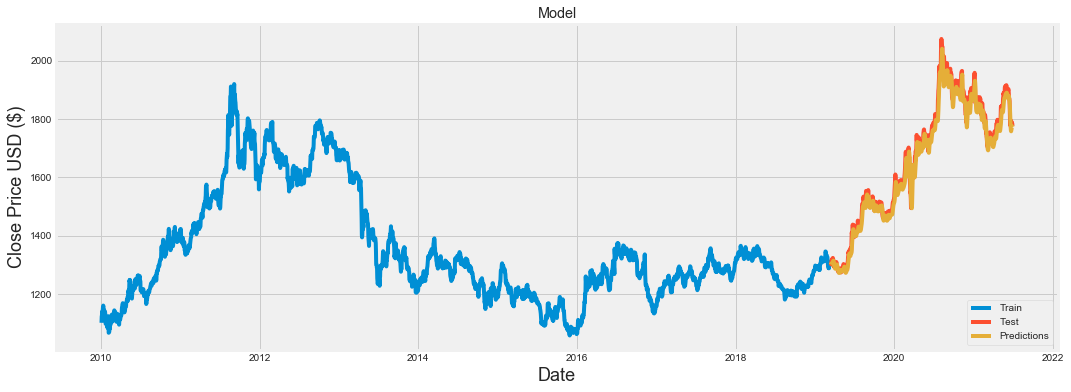

In [77]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model - USD-XAU')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Bid_Quote', fontsize=18)
plt.plot(train['Close_Bid_Quote'])
plt.plot(valid[['Close_Bid_Quote', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [75]:
# Show the valid and predicted prices
valid

,Close_Bid_Quote,Predictions
Timestamp,,
2019-03-15,1306.2280,1301.686768
2019-03-16,1304.3165,1303.133301
2019-03-17,1302.4050,1303.365967
2019-03-18,1307.7450,1302.500122
2019-03-19,1310.7280,1302.115845
...,...,...
2021-06-26,1786.2580,1770.517700
2021-06-27,1782.6980,1773.791748
2021-06-28,1785.6080,1774.761597
